# Notebook for testing and exploring the generalized workflow for feature extraction

In [8]:
import sys
import os
import pandas as pd
import numpy as np

module_path = os.path.abspath(os.path.join('..'))

sys.path.insert(1, module_path + '/src')
import audio_time_series_classification as preproject
import utility

sys.path.insert(1, module_path + '/src/models/')
import helper

from sklearn.decomposition import PCA
from sktime.utils.data_io import load_from_tsfile_to_dataframe
from sklearn.feature_selection import SelectKBest, chi2
from sktime.utils.data_processing import from_nested_to_2d_array
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC

figure_path = module_path + '/figures/'

# Loading already extracted features

In [85]:
'''

X_train_, y_train_ = load_from_tsfile_to_dataframe(module_path + '/features/extracted_features_ts_files/lungsound_preproject_TRAIN.ts')
X_test_, y_test_ = load_from_tsfile_to_dataframe(module_path + '/features/extracted_features_ts_files/lungsound_preproject_TEST.ts')

X_train_ = from_nested_to_2d_array(X_train_)
X_test_ = from_nested_to_2d_array(X_test_)
X_train_.columns = np.arange(len(X_train_.columns))
X_test_.columns = np.arange(len(X_test_.columns))

y_train_ = pd.DataFrame(data = y_train_, columns = ['label'])
y_test_ = pd.DataFrame(data = y_test_ , columns = ['label'])


y_train_[y_train_['label'] == '0'] = 'normal'
y_test_[y_test_['label'] == '0'] = 'normal'

y_train_[y_train_['label'] == '1'] = 'crackle'
y_test_[y_test_['label'] == '1'] = 'crackle'

scaler = MinMaxScaler() 
scaler.fit(X_train_)
X_train_ = pd.DataFrame(scaler.transform(X_train_)) 
X_test_ = pd.DataFrame(scaler.transform(X_test_)) 
'''

In [14]:
'''
X_, y_ = load_from_tsfile_to_dataframe(module_path + '/features/extracted_features_ts_files/kaggle.ts')

X_ = from_nested_to_2d_array(X_)

X_.columns = np.arange(len(X_.columns))

y_ = pd.Series(y_)

kwargs = dict(test_size=0.2, random_state=1)
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, **kwargs)


kwargs = dict(test_size=0.25, random_state=1)
X_train_, X_val_, y_train_, y_val_ = train_test_split(X_train_, y_train_, **kwargs)
'''
X_train_, y_train_ = load_from_tsfile_to_dataframe(module_path + f'/features/extracted_features_ts_files/kaggle_TRAIN.ts')
X_test_, y_test_ = load_from_tsfile_to_dataframe(module_path + f'/features/extracted_features_ts_files/kaggle_TEST.ts')
X_val_, y_val_ = load_from_tsfile_to_dataframe(module_path + f'/features/extracted_features_ts_files/kaggle_VAL.ts')

X_train_, X_test_, X_val_ = from_nested_to_2d_array(X_train_), from_nested_to_2d_array(X_test_), from_nested_to_2d_array(X_val_)

cols = np.arange(len(X_test_.columns))
X_train_.columns, X_test_.columns, X_val_.columns = cols, cols, cols

y_train_, y_test_, y_val_ = pd.Series(y_train_), pd.Series(y_test_), pd.Series(y_val_)


scaler = MinMaxScaler() 
scaler.fit(X_train_)
X_train_ = pd.DataFrame(scaler.transform(X_train_)) 
X_val_ = pd.DataFrame(scaler.transform(X_val_)) 
X_test_ = pd.DataFrame(scaler.transform(X_test_))


indices_0 = np.where(y_val_ == 'normal')[0]
indices_1 = np.where(y_val_ == 'wheeze')[0]
indices_2 = np.where(y_val_ == 'crackle')[0]
#indices_val_ = np.concatenate((indices_0, indices_2))
indices_val_ = np.concatenate((indices_0, indices_1, indices_2))

indices_0 = np.where(y_train_ == 'normal')[0]
indices_1 = np.where(y_train_ == 'wheeze')[0]
indices_2 = np.where(y_train_ == 'crackle')[0]
#indices_train_ = np.concatenate((indices_0, indices_2))
indices_train_ = np.concatenate((indices_0, indices_1, indices_2))

indices_0 = np.where(y_test_ == 'normal')[0]
indices_1 = np.where(y_test_ == 'wheeze')[0]
indices_2 = np.where(y_test_ == 'crackle')[0]
#indices_test_ = np.concatenate((indices_0, indices_2))
indices_test_ = np.concatenate((indices_0, indices_1, indices_2))

In [10]:
'''
win_len = '3'
#X, y = load_from_tsfile_to_dataframe(module_path + f'/features/extracted_features_ts_files/UiTdataset_{win_len}s.ts')
X, y = load_from_tsfile_to_dataframe(module_path + f'/features/extracted_features_ts_files/UiTdataset_FULL.ts')

X = from_nested_to_2d_array(X)

X.columns = np.arange(len(X.columns))

y = pd.Series(y)

kwargs = dict(test_size=0.2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, **kwargs)


kwargs = dict(test_size=0.25, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, **kwargs)
'''
X_train, y_train = load_from_tsfile_to_dataframe(module_path + f'/features/extracted_features_ts_files/UiTdataset_TRAIN.ts')
X_test, y_test = load_from_tsfile_to_dataframe(module_path + f'/features/extracted_features_ts_files/UiTdataset_TEST.ts')
X_val, y_val = load_from_tsfile_to_dataframe(module_path + f'/features/extracted_features_ts_files/UiTdataset_VAL.ts')

X_train, X_test, X_val = from_nested_to_2d_array(X_train), from_nested_to_2d_array(X_test), from_nested_to_2d_array(X_val)

cols = np.arange(len(X_test.columns))
X_train.columns, X_test.columns, X_val.columns = cols, cols, cols

y_train, y_test, y_val = pd.Series(y_train), pd.Series(y_test), pd.Series(y_val)



scaler = MinMaxScaler() 
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train)) 
X_val = pd.DataFrame(scaler.transform(X_val)) 
X_test = pd.DataFrame(scaler.transform(X_test)) 

indices_0 = np.where(y_val == 'normal')[0]
indices_1 = np.where(y_val == 'wheeze')[0]
indices_2 = np.where(y_val == 'crackle')[0]
#indices_val = np.concatenate((indices_0, indices_2))
indices_val = np.concatenate((indices_0, indices_1, indices_2))

indices_0 = np.where(y_train == 'normal')[0]
indices_1 = np.where(y_train == 'wheeze')[0]
indices_2 = np.where(y_train == 'crackle')[0]
#indices_train = np.concatenate((indices_0, indices_2))
indices_train = np.concatenate((indices_0, indices_1, indices_2))


indices_0 = np.where(y_test == 'normal')[0]
indices_1 = np.where(y_test == 'wheeze')[0]
indices_2 = np.where(y_test == 'crackle')[0]
#indices_test = np.concatenate((indices_0, indices_2))
indices_test = np.concatenate((indices_0, indices_1, indices_2))

In [15]:
y_val_c = pd.concat([y_val.iloc[indices_val], y_val_.iloc[indices_val_]])
X_val_c = pd.concat([X_val.iloc[indices_val], X_val_.iloc[indices_val_]])

y_test_c = pd.concat([y_test.iloc[indices_test], y_test_.iloc[indices_test_]])
X_test_c = pd.concat([X_test.iloc[indices_test], X_test_.iloc[indices_test_]])

y_train_c = pd.concat([y_train.iloc[indices_train], y_train_.iloc[indices_train_]])
X_train_c = pd.concat([X_train.iloc[indices_train], X_train_.iloc[indices_train_]])

scaler = MinMaxScaler() 
scaler.fit(X_train_c)
X_train_c = pd.DataFrame(scaler.transform(X_train_c)) 
X_test_c = pd.DataFrame(scaler.transform(X_test_c)) 
X_val_c = pd.DataFrame(scaler.transform(X_val_c)) 

### Plotting PCR

**PLSR plot of the tromsø data**

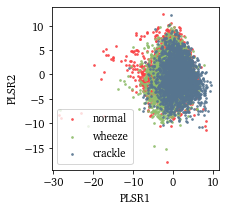

In [12]:
y_train_f = pd.factorize(y_train.iloc[indices_train])

pls2 = PLSRegression(n_components=2)
p2 = pls2.fit_transform(X_train.iloc[indices_train], y_train_f[0])
f, ax = helper.scatterplot_with_colors(p2[0], y_train_f[0],
                                       module_path, new_legends = list(y_train_f[1]),
                                       x_y_labels = ['PLSR1', 'PLSR2'])

plt.show()

f.savefig(figure_path + f'kaggle_vs_uit/PLSR_uit.pdf', bbox_inches='tight')

**PLSR plot of Kaggle dataset**

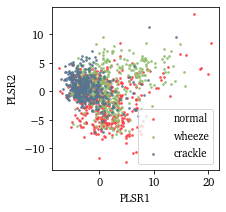

In [16]:
y_train_f = pd.factorize(y_train_.iloc[indices_train_])

pls2 = PLSRegression(n_components=2)
p2 = pls2.fit_transform(X_train_.iloc[indices_train_], y_train_f[0])
f, ax = helper.scatterplot_with_colors(p2[0], y_train_f[0],
                                       module_path, new_legends = list(y_train_f[1]),
                                       x_y_labels = ['PLSR1', 'PLSR2'])

plt.show()

f.savefig(figure_path + f'kaggle_vs_uit/PLSR_kaggle.pdf', bbox_inches='tight')

**PLSR plot when combining the two datasets**

Clearly the two datasets come from different distributions

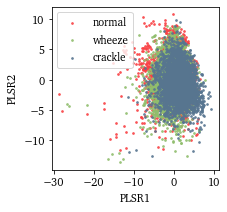

In [17]:
y_train_f = pd.factorize(y_train_c)

pls2 = PLSRegression(n_components=2)
p2 = pls2.fit_transform(X_train_c, y_train_f[0])
f, ax = helper.scatterplot_with_colors(p2[0], y_train_f[0],
                                       module_path, new_legends = list(y_train_f[1]),
                                       x_y_labels = ['PLSR1', 'PLSR2'])

plt.show()
f.savefig(figure_path + f'kaggle_vs_uit/PLSR_combined.pdf', bbox_inches='tight')

## Testing with K-NN classifier 

KNN classifier performed the best in the preproject


**Tromsø dataset**

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500],
    'max_depth' : [4,6,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5).fit(X_train.iloc[indices_train] , y_train.iloc[indices_train])

In [33]:
CV_rfc.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500,
                       random_state=42)

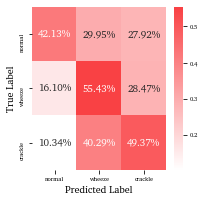

In [21]:
from sklearn.ensemble import RandomForestClassifier

class_names =  list(pd.factorize(y_train.iloc[indices_train])[1])
clf = RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500,
                       random_state=42)
#clf = GaussianNB()
#clf = KNeighborsClassifier(n_neighbors=4, weights='distance')


clf.fit(X_train.iloc[indices_train] , y_train.iloc[indices_train])
y_pred = clf.predict(X_test.iloc[indices_test])

f, ax = utility.plot_cm(y_test.iloc[indices_test] , y_pred, module_path = module_path, class_names = class_names)

f.savefig(figure_path + f'kaggle_vs_uit/cm_knn_uit.pdf', bbox_inches='tight')

**Kaggle dataset**

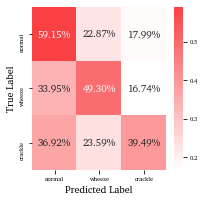

In [24]:
#clf = GaussianNB().fit(X_train, y_train)
class_names =  list(pd.factorize(y_train_.iloc[indices_train_])[1])

#clf = KNeighborsClassifier(n_neighbors=4, weights='distance')
clf = RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500,
                       random_state=42)

clf.fit(X_train_.iloc[indices_train_] , y_train_.iloc[indices_train_])
y_pred = clf.predict(X_val_.iloc[indices_val_])

f, ax = utility.plot_cm(y_val_.iloc[indices_val_] , y_pred, module_path = module_path, class_names = class_names)


f.savefig(figure_path + f'kaggle_vs_uit/cm_knn_kaggle.pdf', bbox_inches='tight')

**Combination of the two datasets**

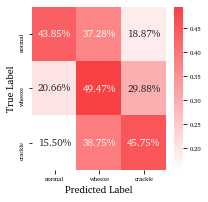

In [25]:
class_names =  list(pd.factorize(y_train_.iloc[indices_train_])[1])

#clf = KNeighborsClassifier(n_neighbors=4, weights='distance')
clf = RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500,
                       random_state=42)

clf.fit(X_train_c , y_train_c)
y_pred = clf.predict(X_val_c)

f, ax = utility.plot_cm(y_val_c , y_pred, module_path = module_path, class_names = class_names)

f.savefig(figure_path + f'kaggle_vs_uit/cm_knn_combined.pdf', bbox_inches='tight')

**Triple classification problem**

when using the tromsø dataset, with 5s slices

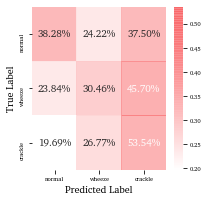

In [3]:
clf = KNeighborsClassifier(n_neighbors=4, weights='distance').fit(X_train , y_train)
 
y_pred = clf.predict(X_val)

f, ax = utility.plot_cm(y_val, y_pred, module_path = module_path, class_names = list(y_test.value_counts().index))


#f.savefig(figure_path + f'kaggle_vs_uit/cm_knn_uit_multiclass_{win_len}s.pdf', bbox_inches='tight')

f.savefig(figure_path + f'kaggle_vs_uit/cm_knn_uit_multiclass_FULL.pdf', bbox_inches='tight')

# Train on UiT data, test on Kaggle Data

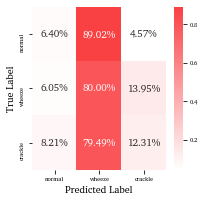

In [28]:
class_names =  list(pd.factorize(y_train.iloc[indices_train])[1])


#clf = KNeighborsClassifier(n_neighbors=4, weights='distance')
clf = RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500,
                       random_state=42)

clf.fit(X_train.iloc[indices_train] , y_train.iloc[indices_train] )

y_pred = clf.predict(X_val_.iloc[indices_val_])

f, ax = utility.plot_cm(y_val_.iloc[indices_val_] , y_pred, module_path = module_path, class_names = class_names)

f.savefig(figure_path + f'kaggle_vs_uit/cm_train_uit_test_kaggle.pdf', bbox_inches='tight')

## Train on UiT + Kaggle, and test on Kaggle data

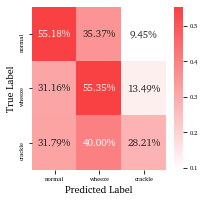

In [29]:
#clf = KNeighborsClassifier(n_neighbors=4, weights='distance')

clf = RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500,
                       random_state=42)

clf.fit(X_train_c, y_train_c )

y_pred = clf.predict(X_val_.iloc[indices_val_])

f, ax = utility.plot_cm(y_val_.iloc[indices_val_] , y_pred, module_path = module_path, class_names = class_names)

f.savefig(figure_path + f'kaggle_vs_uit/cm_combined_test_kaggle.pdf', bbox_inches='tight')